In [1]:
import sys
sys.path.append('../src/')

In [2]:
# Third-party libraries:
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
# My libraries:
import dataset.dataset as dtset
from dbclass.dbclass import DBCLASS
from dbclass import dbclass_utils as db_utils


In [3]:
# import some data to play with
ds = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
ds['data'] = db_utils.get_pca_data(ds['data'], n_components=80)

In [4]:
# Splitting the data for trainning and for test:
ds_train, ds_test = dtset.split_data(ds, prop_train=0.8)

0% concluído...
0% concluído...
10% concluído...
20% concluído...
30% concluído...
40% concluído...
50% concluído...
60% concluído...
70% concluído...
80% concluído...
90% concluído...


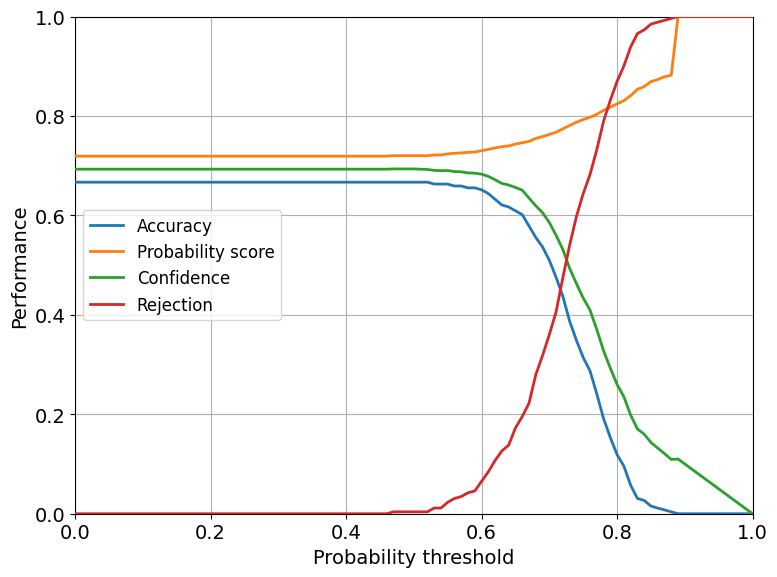


Best probability threshold value: 0.47000000000000003
accuracy 0.6668
prob_score 0.720071
rejection 0.003801
confidence 0.693435


In [5]:
# Trainning the model using cross validation in the trainning dataset:
dbclass = DBCLASS()
# prob_thold_list = [0, 0.1, 0.2, 0.3] + list(np.arange(0.4, 0.6, 0.01)) + [0.6, 0.7, 0.8, 0.999]
prob_thold_list = np.append(np.arange(0, 1, 0.01), 0.999)
best_prob_thold, class_metrics = db_utils.cross_validation_trainning(dbclass, ds_train, ds_test, prob_thold_list)
print("\nBest probability threshold value:", best_prob_thold)
for metric in class_metrics.keys():
    print(metric, class_metrics[metric])

C:\Users\weldl\Miniconda3\envs\dbclass\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\weldl\Miniconda3\envs\dbclass\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\weldl\Miniconda3\envs\dbclass\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

     Ariel Sharon       0.33      0.90      0.48        77
     Colin Powell       0.78      0.72      0.75       236
  Donald Rumsfeld       0.71      0.66      0.68       121
    George W Bush       0.92      0.65      0.76       530
Gerhard Schroeder       0.68      0.65      0.66       109
      Hugo Chavez       0.74      0.77      0.76        71
       Tony Blair       0.59      0.79      0.68       144
          Unknown       0.00      0.00      0.00         0

         accuracy                           0.70      1288
        macro avg       0.59      0.64      0.60      1288
     weighted avg       0.77      0.70      0.72      1288


Confusion matrix:
[[ 5.36  0.16  0.08  0.    0.08  0.    0.31  0.  ]
 [ 2.48 13.2   0.62  0.54  0.08  0.23  1.01  0.16]
 [ 1.24  0.39  6.21  0.78  0.47  0.16  0.16  0.  ]
 [ 5.51  2.33  1.4  26.71  1.16  0.85  3.11  0.08]
 [ 0.7   0.31  0.23  0.39  5.51  0.16  1.16  0.  ]
 [ 0.47  0.23  

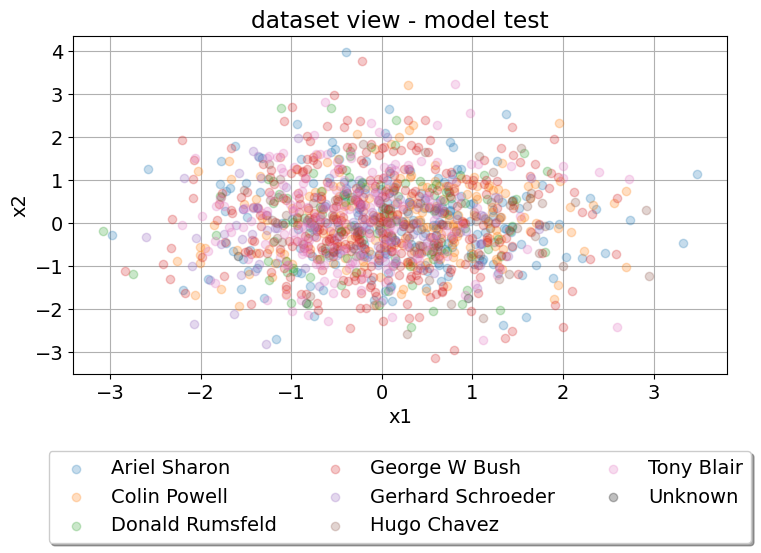

In [6]:
# Once the best probability score threshold is found, the classifier is
# configured with the best settings:
dbclass = DBCLASS(prob_thold=best_prob_thold)
dbclass.fit(ds['data'], ds['target'])
db_utils.dbclass_model_test(dbclass, ds)